## HW1: Train a perceptron model

In this homework, you will train a perceptron model with a simple dataset.

**Notes:** 
- When you submit your assignment, the output of every cell should be visible.
- You are not eligible to change any parts of the code except the predefined sections.
- You can add your implementation only in the predefined sections.



In [ ]:
#@title Student Information
#@markdown Enter the following info and run the cell:
Name = "Abdollhadi Razi Jalali" #@param {type:"string"}
StudentNumber =  99725504#@param {type:"integer"}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Dataset

In [ ]:
################################
## Change directory to the folder of the dataset
## For example, if the dataset is in NN/HW1 of your google drive, you should use this code in colab:
## cd drive/MyDrive/NN/HW1
################################

In [ ]:
cd /content/drive/MyDrive/Master/ANN/HW-01

/content/drive/MyDrive/Master/ANN/HW-01


In [ ]:
pwd

'/content/drive/MyDrive/Master/ANN/HW-01'

In [ ]:
## Load the dataset
dataset = pd.read_csv("dataset.csv")

In [ ]:
## Dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      500 non-null    float64
 1   x2      500 non-null    float64
 2   y       500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [ ]:
## See the five first rows of the dataset.
dataset.head()

,x1,x2,y
0,2.780914,3.649500,0
1,0.649471,4.428423,0
2,-3.393311,-1.439415,1
3,3.007704,2.896864,0
4,-3.745867,1.894699,1


Text(0.5, 1.0, 'Random Classification Data with 2 classes')

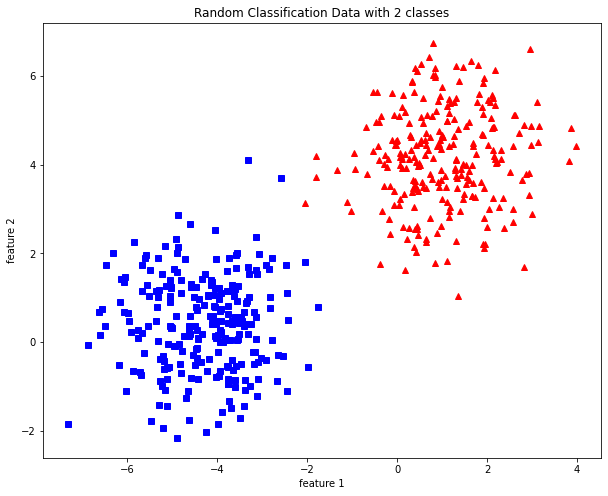

In [ ]:
## Plot the dataset
X = dataset.drop(["y"], axis=1).values
y = dataset["y"].values

fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

## Implement the algorithm

You have two weights and one bias. Let's call them w1 and w2 and b. Your have to code a simple gradient descent algorithm for updating these parameters. 

In [ ]:
## Initialization of the parameters.
w1 = 0
w2 = 0
b = 0

In [ ]:
def calculate_output(X, w1, w2, b):
  ##############################################
    ## code here
    ## y_out is the output of your neuron.
    ## First, you should implement this formula: y_out = w1 * x1 + w2 * x2 + b
    ## please be careful to calculate this formula for all of the 500 data
    ## Second, you should implement a Unit Step function as an activation function for each element of the y_out
    ## the y_out should be an array with a length of 500.
  ##############################################
  y_out = w1 * X[:,0] + w2 * X[:,1] + b
  return y_out

In [ ]:
## implement the gradient descent algorithm
lr = 0.1
num_epochs = 20


for i in range(num_epochs):
  y_out = calculate_output(X, w1, w2, b)
  errors = 0
  for j in range(X.shape[0]):
    if y[j] != y_out[j] :
      errors += 1
    ######################################
    ## code here
    ## implement the code for updating each parameter
    ######################################
    b = b + lr * (y[j] - y_out[j])
    w1 = w1 + lr * X[j,0] * (y[j] - y_out[j])
    w2 = w2 + lr * X[j,1] * (y[j] - y_out[j])

  print("in epoch : ", i, " errors : ", errors)

print("w1 : ", w1, "w2 : ", w2, "b : ", b)

in epoch :  0  errors :  250
in epoch :  1  errors :  500
in epoch :  2  errors :  500
in epoch :  3  errors :  500
in epoch :  4  errors :  500
in epoch :  5  errors :  500
in epoch :  6  errors :  500
in epoch :  7  errors :  500
in epoch :  8  errors :  500
in epoch :  9  errors :  500
in epoch :  10  errors :  500
in epoch :  11  errors :  500
in epoch :  12  errors :  500
in epoch :  13  errors :  500
in epoch :  14  errors :  500
in epoch :  15  errors :  500
in epoch :  16  errors :  500
in epoch :  17  errors :  500
in epoch :  18  errors :  500
in epoch :  19  errors :  500
w1 :  3.117740631562383e+54 w2 :  2.004885792990868e+54 b :  -5.76876627768641e+52


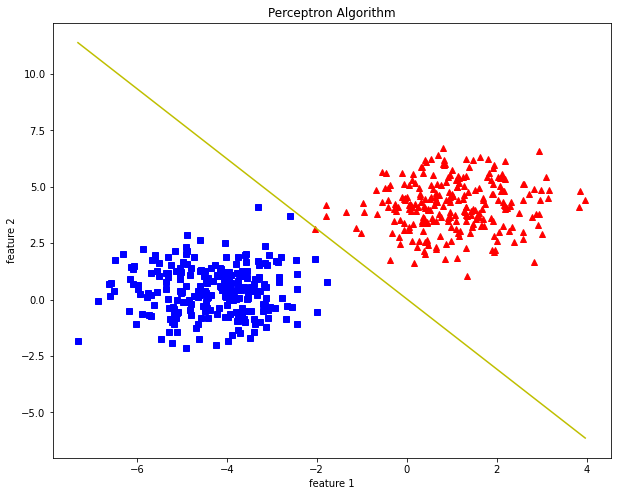

In [ ]:
## Plot the result
x1 = [min(X[:,0]), max(X[:,0])]
m = -w1/w2
c = -b/w2
x2 = np.dot(m, x1) + c
    
fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Perceptron Algorithm')
plt.plot(x1, x2, 'y-')

## Bonus Section
Explain learning rate decay and different methods for that.
Also, implement one of the methods of learning decay on the implemented code.